In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
data.head(20)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [4]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
df = data.drop('Poster_Link' , axis = 1)
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [6]:
df.shape

(1000, 15)

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(1000, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 125.0+ KB


In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [11]:
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())
df['Gross'] = df['Gross'].fillna(df['Gross'].mode()[0])

In [12]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

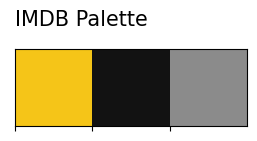

In [13]:
sns.palplot(['#f5c518', '#121212','#8b8b8b'])

plt.title("IMDB Palette ",loc='left',fontfamily='Comic Sans MS',fontsize=15,y=1.2)
plt.show()

<AxesSubplot:xlabel='Certificate', ylabel='count'>

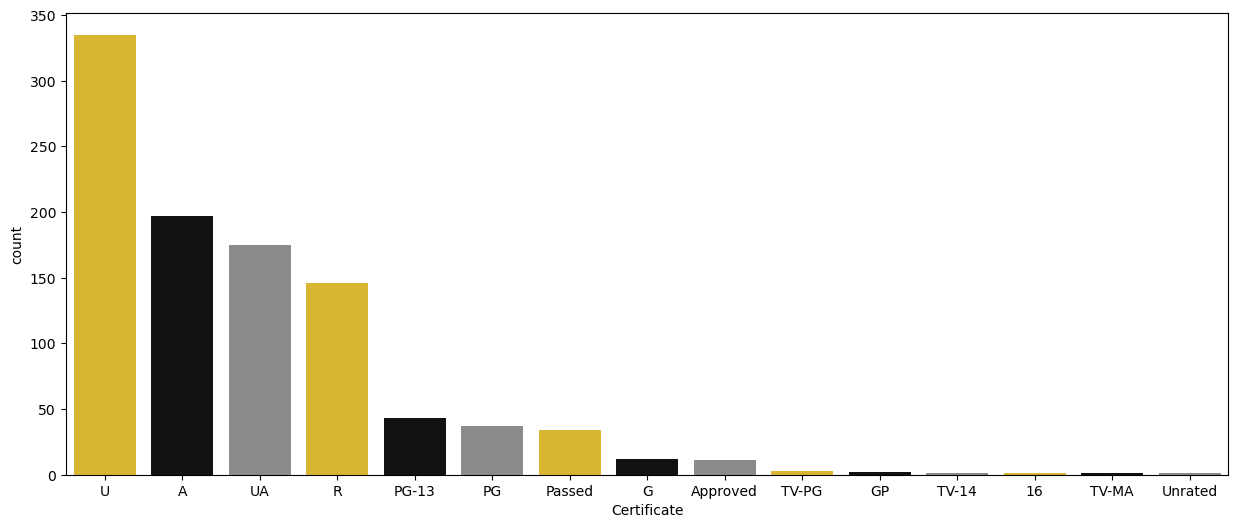

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='Certificate', order = df['Certificate'].value_counts().index[0:-1],palette =['#f5c518', '#121212','#8b8b8b'],data = df)

<AxesSubplot:xlabel='IMDB_Rating', ylabel='count'>

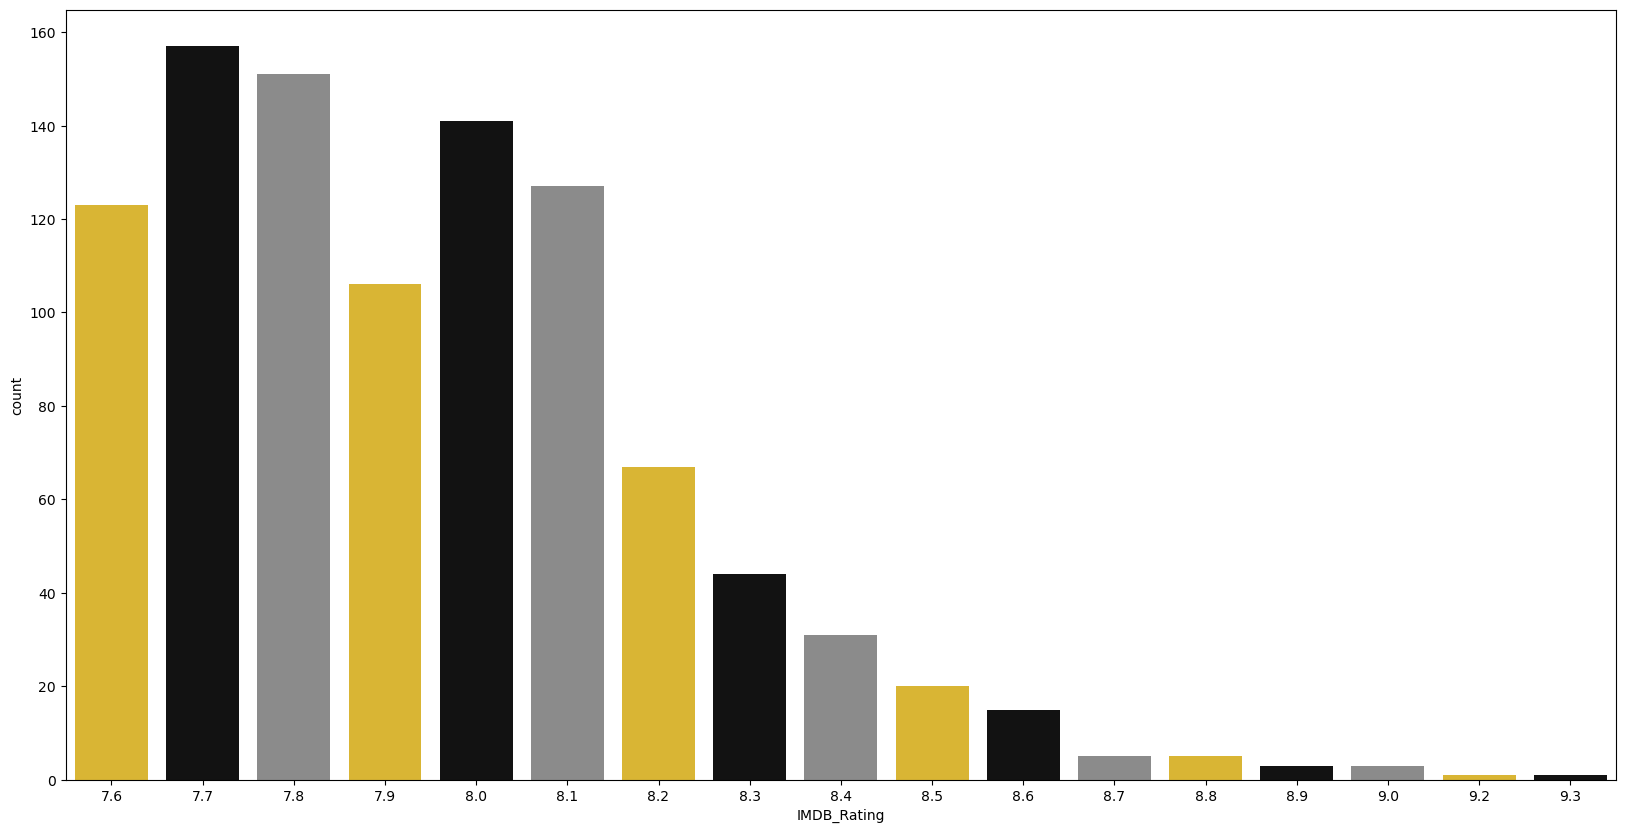

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='IMDB_Rating',palette =['#f5c518', '#121212','#8b8b8b'], data = df)

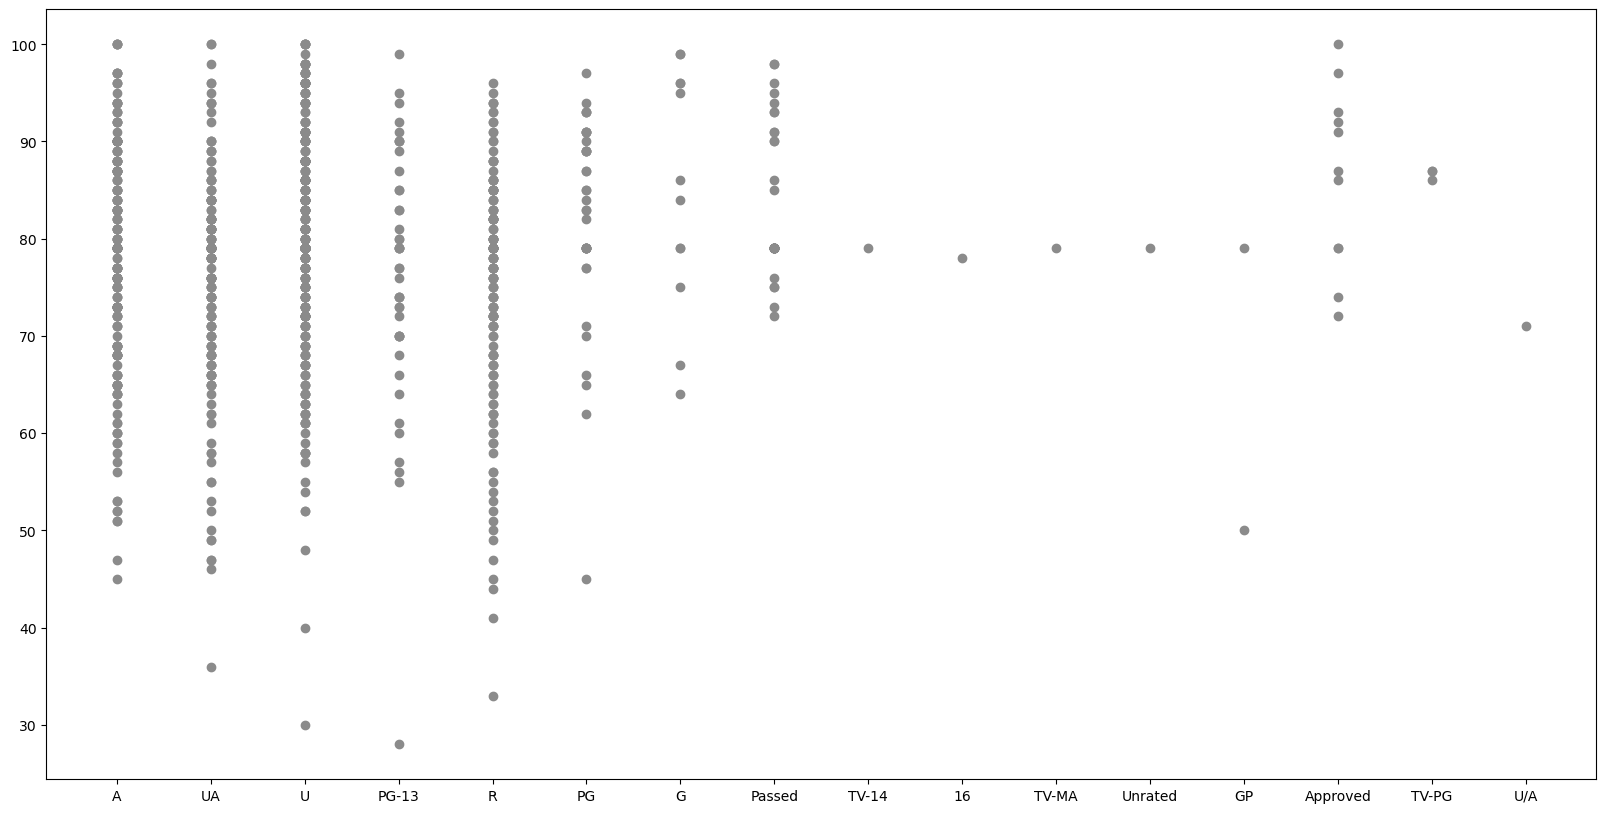

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(df['Certificate'], df['Meta_score'],color='#8b8b8b')
plt.show()

In [17]:
df['Genre'].nunique()

202

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Drama, Romance'),
  Text(2, 0, 'Comedy, Drama'),
  Text(3, 0, 'Comedy, Drama, Romance'),
  Text(4, 0, 'Action, Crime, Drama'),
  Text(5, 0, 'Biography, Drama, History'),
  Text(6, 0, 'Crime, Drama, Thriller'),
  Text(7, 0, 'Crime, Drama, Mystery'),
  Text(8, 0, 'Crime, Drama'),
  Text(9, 0, 'Animation, Adventure, Comedy'),
  Text(10, 0, 'Action, Adventure, Sci-Fi'),
  Text(11, 0, 'Biography, Crime, Drama'),
  Text(12, 0, 'Drama, War'),
  Text(13, 0, 'Comedy, Crime, Drama'),
  Text(14, 0, 'Action, Adventure, Drama')])

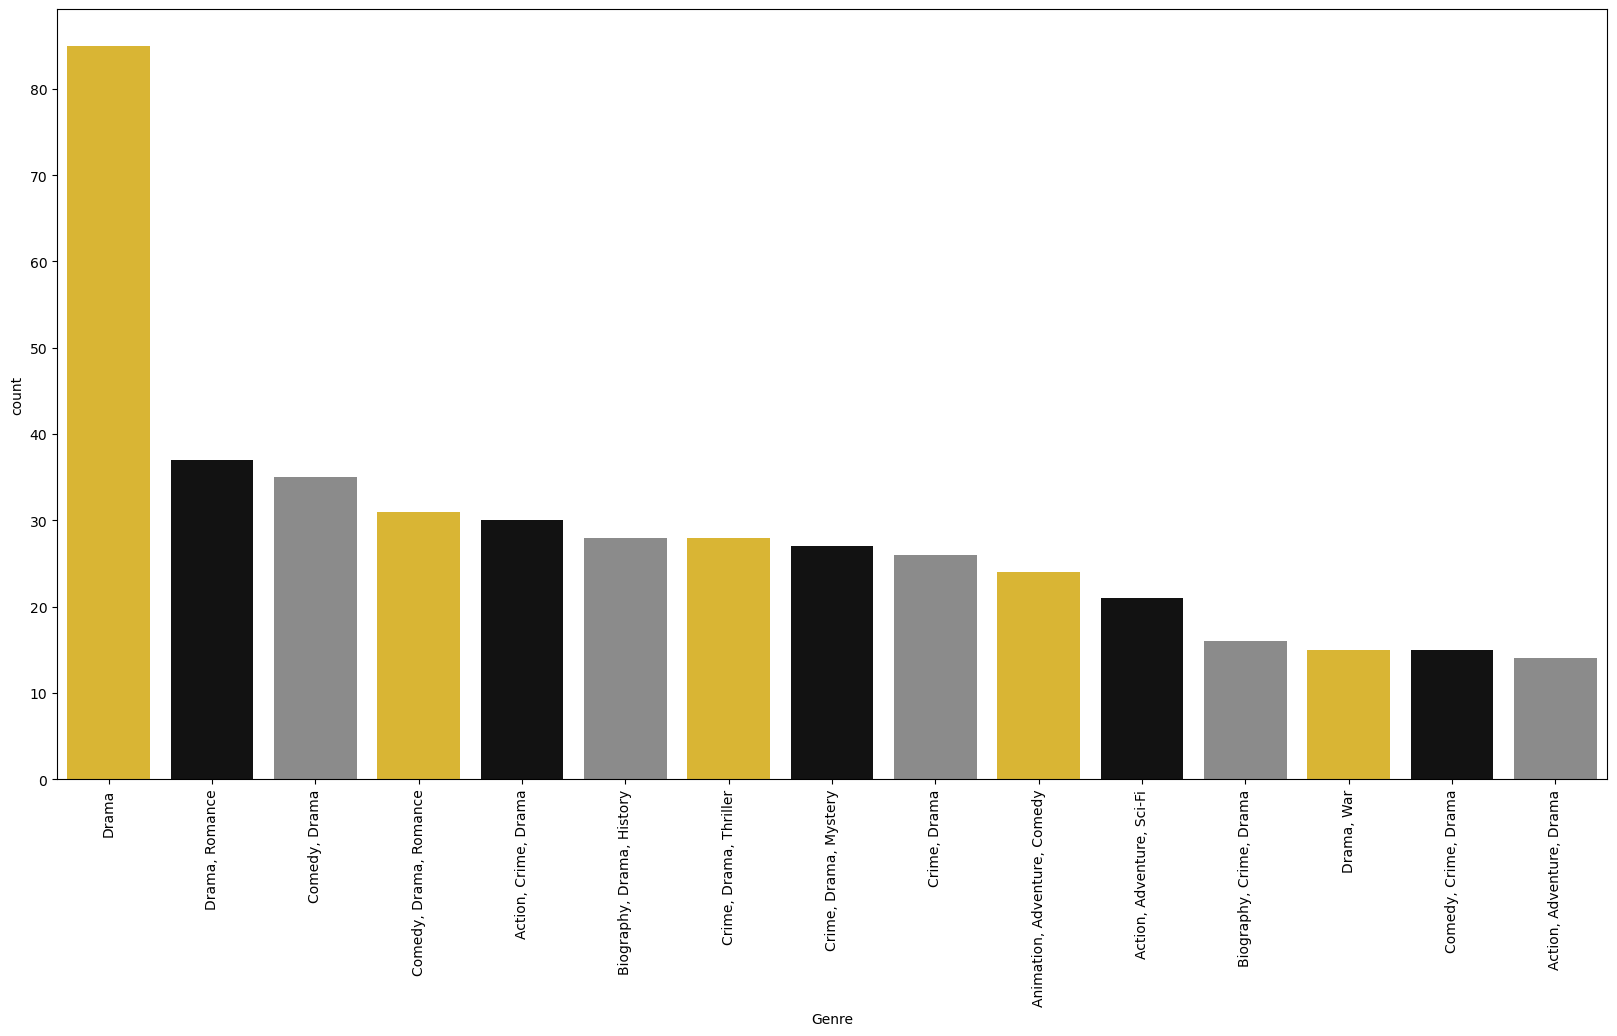

In [18]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Genre',data=df,palette =['#f5c518', '#121212','#8b8b8b'], order=df['Genre'].value_counts().index[0:15])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Released_Year', ylabel='count'>

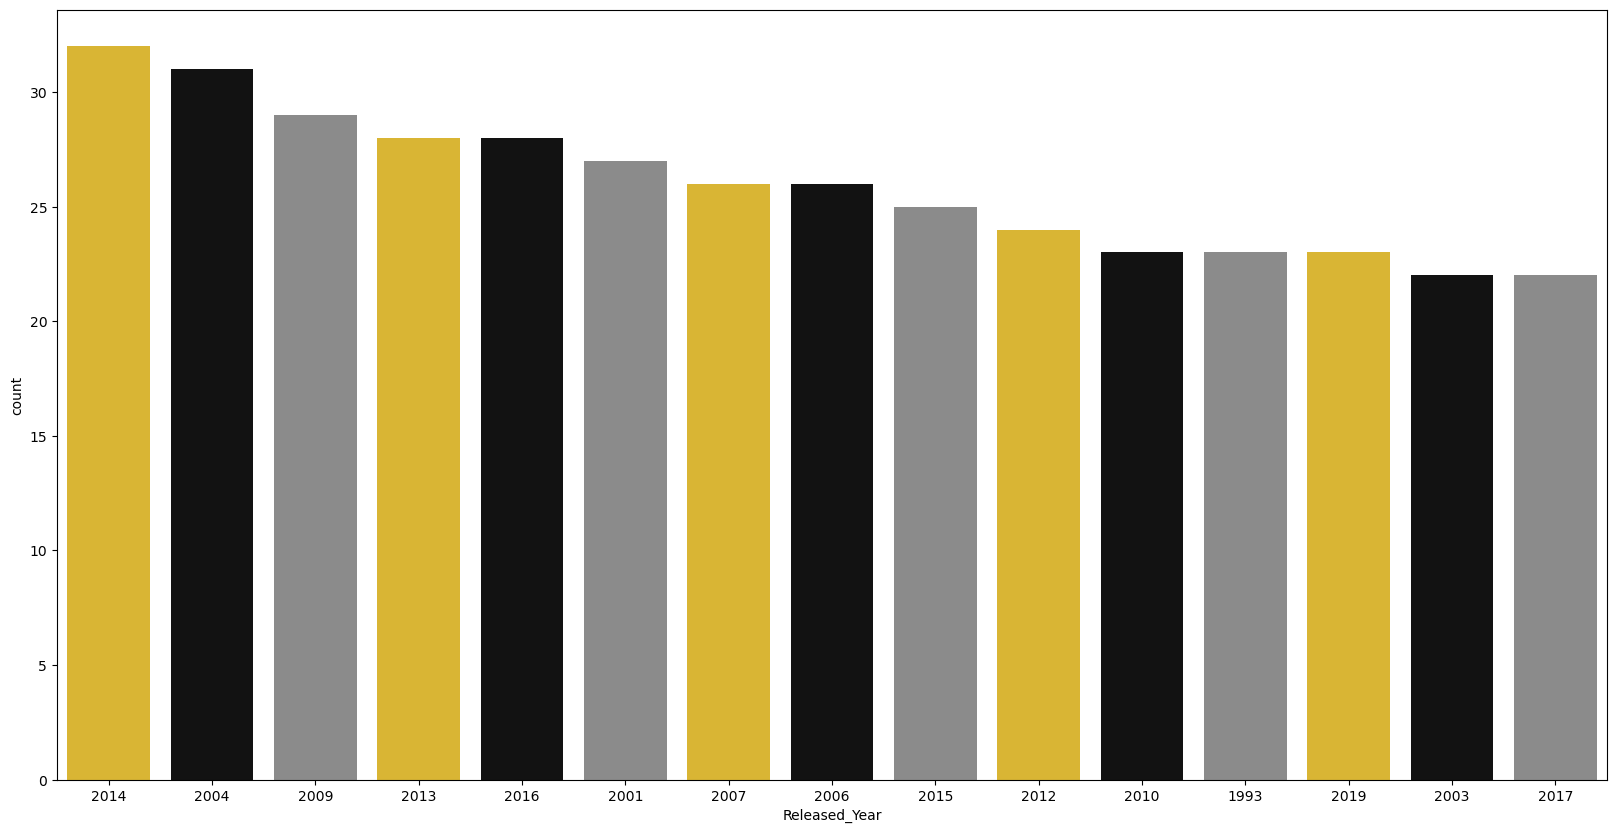

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='Released_Year',data=df,palette =['#f5c518', '#121212','#8b8b8b'], order=df['Released_Year'].value_counts().index[0:15])